## Milk production
Este conjunto de datos recoge la produccion de leche mensual de una granja.
Atributos:
<ul>
<li>Month: Mes donde se recogen los datos</li>
<li>Milk production: Litros recogidos por la granja en un determinado mes</li>

</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from google.colab import drive

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/proyecto-tensorflow/buenos/monthly-milk-production.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar los datos
df = pd.read_csv(path)
df

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0
...,...,...
163,1975-08-01 01:00:00,858.0
164,1975-09-01 01:00:00,817.0
165,1975-10-01 01:00:00,827.0
166,1975-11-01 01:00:00,797.0


In [4]:
# Imprimir los valores de la columna 'Milk Production' para las primeras 15 filas usando iloc
print(df['Milk Production'].iloc[:15])

0     589.0
1     561.0
2     640.0
3     656.0
4     727.0
5     697.0
6     640.0
7     599.0
8     568.0
9     577.0
10    553.0
11    582.0
12    600.0
13    566.0
14    653.0
Name: Milk Production, dtype: float64


In [5]:
# Imprimir los valores de la columna 'Month' para las primeras 15 filas usando iloc
print(df['Month'].iloc[:15])

0     1962-01-01 01:00:00
1     1962-02-01 01:00:00
2     1962-03-01 01:00:00
3     1962-04-01 01:00:00
4     1962-05-01 01:00:00
5     1962-06-01 01:00:00
6     1962-07-01 01:00:00
7     1962-08-01 01:00:00
8     1962-09-01 01:00:00
9     1962-10-01 01:00:00
10    1962-11-01 01:00:00
11    1962-12-01 01:00:00
12    1963-01-01 01:00:00
13    1963-02-01 01:00:00
14    1963-03-01 01:00:00
Name: Month, dtype: object


In [6]:
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Milk Production'].values.reshape(-1, 1))

In [14]:
scaled_data[:30]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385]])

In [8]:
# Agrupa los datos de cada año.
# Generar secuencias de longitud sequence_length (12 meses en este caso) para usar como entradas para la LSTM. Cada secuencia X tiene 12 valores y la etiqueta y es el valor siguiente en la serie temporal.
sequence_length = 12
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X = np.array(X)
y = np.array(y)

In [16]:
print(X[1])

[[0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]
 [0.34615385]
 [0.20913462]
 [0.11057692]
 [0.03605769]
 [0.05769231]
 [0.        ]
 [0.06971154]
 [0.11298077]]


In [15]:
print(y[0])

[0.11298077]


In [9]:
X.shape

(156, 12, 1)

In [10]:
y.shape

(156, 1)

In [17]:
# Dividir en conjuntos de entrenamiento y prueba
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 12, 1)
(32, 12, 1)
(124, 1)
(32, 1)


In [19]:
# Redimensionar las entradas para la LSTM
# Redimensionar las entradas para que sean compatibles con la entrada esperada por la LSTM, que es de la forma (muestras, secuencia, características).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 12, 1)
(32, 12, 1)
(124, 1)
(32, 1)


In [21]:
X_train[0]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154]])

In [22]:
y_train[0]

array([0.11298077])

In [23]:
# Definir la arquitectura del modelo LSTM
# Una LSTM (Long Short-Term Memory) es un tipo de red neuronal recurrente (RNN) diseñada específicamente para aprender dependencias a largo plazo en secuencias de datos
# Crear un modelo LSTM con dos capas LSTM y dos capas densas (fully connected). La primera capa LSTM tiene return_sequences=True para que la salida sea una secuencia de la misma longitud que la entrada.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Entrenar el modelo
history = model.fit(X_train, y_train, batch_size=1, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
124/124 [==============================] - 7s 19ms/step - loss: 0.0352 - val_loss: 0.0431
Epoch 2/20
124/124 [==============================] - 1s 10ms/step - loss: 0.0291 - val_loss: 0.0238
Epoch 3/20
124/124 [==============================] - 1s 9ms/step - loss: 0.0247 - val_loss: 0.0285
Epoch 4/20
124/124 [==============================] - 1s 10ms/step - loss: 0.0165 - val_loss: 0.0098
Epoch 5/20
124/124 [==============================] - 1s 9ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 6/20
124/124 [==============================] - 1s 10ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 7/20
124/124 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 8/20
124/124 [==============================] - 2s 13ms/step - loss: 0.0068 - val_loss: 0.0114
Epoch 9/20
124/124 [==============================] - 2s 13ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 10/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0041 - val_loss

In [26]:
# Evaluar el modelo
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 1s 872ms/step - loss: 0.0048
Test loss: 0.0048447479493916035


In [27]:
# Predicciones próximo año
future_months = 12
future_predictions = []
last_sequence = X[-1] # Coger secuencia de datos del último año
print(last_sequence)
for i in range(future_months):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1)) # Reconfigura la secuencia para que tenga la entrada adecuada
    future_predictions.append(prediction[0][0]) # Guarda el valor
    last_sequence = np.roll(last_sequence, -1) # Desplaza los elementos una posición a la izquierda
    last_sequence[-1] = prediction[0][0] # Actualiza el último elemento con la predicción
    print(future_predictions)

[[0.625     ]
 [0.67548077]
 [0.55048077]
 [0.81490385]
 [0.84134615]
 [0.99278846]
 [0.92307692]
 [0.82451923]
 [0.73317308]
 [0.63461538]
 [0.65865385]
 [0.58653846]]
1/1 [==============================] - 1s 1s/step
[0.64693415]
1/1 [==============================] - 0s 52ms/step
[0.64693415, 0.69429046]
1/1 [==============================] - 0s 74ms/step
[0.64693415, 0.69429046, 0.7678741]
1/1 [==============================] - 0s 27ms/step
[0.64693415, 0.69429046, 0.7678741, 0.8860264]
1/1 [==============================] - 0s 22ms/step
[0.64693415, 0.69429046, 0.7678741, 0.8860264, 0.9774932]
1/1 [==============================] - 0s 24ms/step
[0.64693415, 0.69429046, 0.7678741, 0.8860264, 0.9774932, 1.031237]
1/1 [==============================] - 0s 22ms/step
[0.64693415, 0.69429046, 0.7678741, 0.8860264, 0.9774932, 1.031237, 0.9885046]
1/1 [==============================] - 0s 23ms/step
[0.64693415, 0.69429046, 0.7678741, 0.8860264, 0.9774932, 1.031237, 0.9885046, 0.8886018]
1

In [28]:
# Aplica la transformación inversa a los datos. Esto significa que convierte los datos escalados (normalizados o estandarizados) de vuelta a su escala original.
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [29]:
# Obtener la última fecha de la serie temporal
last_date = pd.to_datetime(df['Month'].iloc[-1])
# Genera fechas futuras desde la última con un rango de un mes
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='M')
# Aplana el array de predicciones futuras y lo agrupa con las fechas nuevas
future_df = pd.DataFrame({'Date': future_dates, 'MilkProduction': future_predictions.flatten()})
print(future_df)

                  Date  MilkProduction
0  1976-01-31 01:00:00      822.124573
1  1976-02-29 01:00:00      841.824768
2  1976-03-31 01:00:00      872.435669
3  1976-04-30 01:00:00      921.586975
4  1976-05-31 01:00:00      959.637207
5  1976-06-30 01:00:00      981.994629
6  1976-07-31 01:00:00      964.217896
7  1976-08-31 01:00:00      922.658325
8  1976-09-30 01:00:00      876.533752
9  1976-10-31 01:00:00      844.268433
10 1976-11-30 01:00:00      831.483276
11 1976-12-31 01:00:00      832.733459


In [30]:
# Hacer predicciones
# Realizamos predicciones con el modelo entrenado y las transformamos de nuevo a los valores originales usando el inverso del MinMaxScaler
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 26ms/step


In [32]:
print(len(df))
print(len(y_test))

168
32


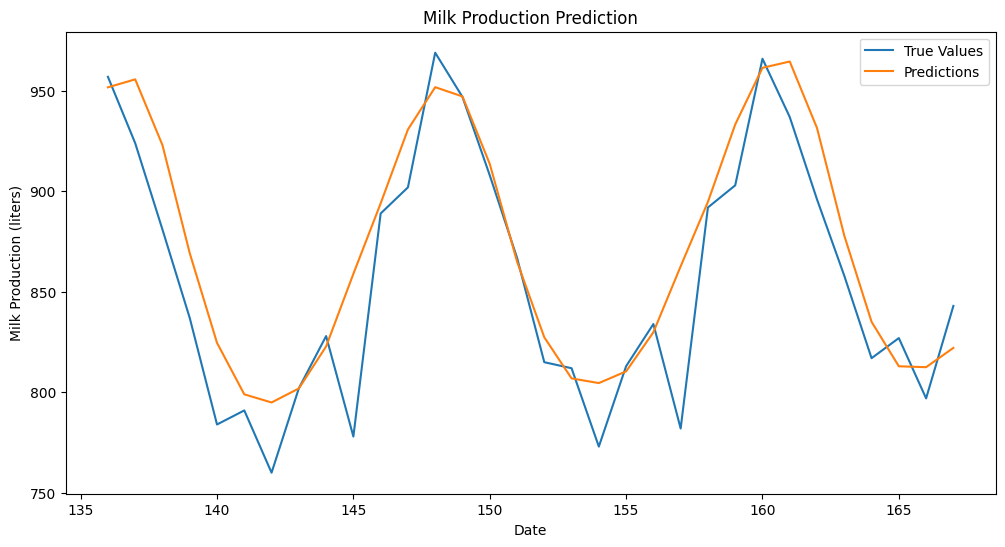

In [33]:
# Mostrar los resultados
# Mostrar los valores verdaderos y las predicciones para comparar el rendimiento del modelo.
plt.figure(figsize=(12, 6))
# Con las fechas últimas, aplica la transformación inversa. Selecciona las 32 últimas filas que son el conjunto de test. Arriba lo hemos separado así
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
# Selecciona últimas fechas y las predicciones
plt.plot(df.index[-len(predictions):], predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Milk Production (liters)')
plt.title('Milk Production Prediction')
plt.legend()
plt.show()

## RNN

In [34]:
# Definir la arquitectura del modelo RNN
# Crear un modelo RNN simple con una capa recurrente (SimpleRNN) y dos capas densas (fully connected).
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test))


Epoch 1/20
124/124 [==============================] - 6s 21ms/step - loss: 0.0141 - val_loss: 0.0070
Epoch 2/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0056 - val_loss: 0.0067
Epoch 3/20
124/124 [==============================] - 1s 9ms/step - loss: 0.0031 - val_loss: 0.0116
Epoch 4/20
124/124 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 5/20
124/124 [==============================] - 1s 10ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 6/20
124/124 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 7/20
124/124 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/20
124/124 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 9/20
124/124 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/20
124/124 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0

In [37]:
# Evaluar el modelo
# Entrenar el modelo usando el conjunto de entrenamiento y validamos con el conjunto de prueba. Evaluamos la pérdida en el conjunto de prueba.
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1/1 [==============================] - 0s 245ms/step - loss: 0.0035
Test loss: 0.0035254848189651966


In [ ]:
# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 154ms/step


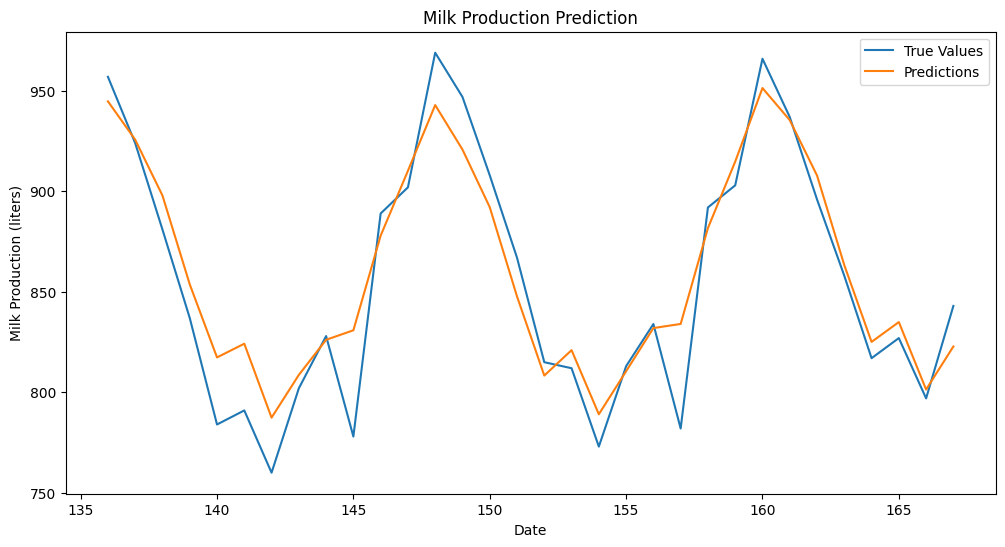

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(df.index[-len(predictions):], predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Milk Production (liters)')
plt.title('Milk Production Prediction')
plt.legend()
plt.show()